# Final project Alejandra Torrez

## 1. Introduction

### 1.1 My database

My proyecto abarca el analisis de secuencias de muestras clínicas (heces) principalmente  positivas para Rotavirus o RVA (hay muy pocas para otros patógenos ya que el objetivo era caracterizar las cepas de RVA). A partir de un set de aproximadamente 300 muestras diarreicas de niños menores a 5 años recolectadas durante el 2023, se extrajo el TNA con un protocolo homemade. El TNA de las muestras posteriormente fue analizado por qPCR para diferentes patógenos entéricos virales y bacterianos. Se seleccionó un set de extractos positivos para RVA y algunos otros patógenos para realizar la preparación de librerías a partir de RNA. Las librerías individuales se unieron en diferentes pooles y fueron cargadas en diferentes ocasiones en cartuchos de una plataforma de Illumina (iSeq100). Las corridas fueron almacenadas en Base Space y luego cargadas a CZ-ID (una plataforma gratuita que ya incluye un pipeline para analizar datos metagenómicos) donde gracias al pipeline se pueden ver directamente los reads y contigs asignados a diferentes patógenos. 

En un análisis previo las secuencias de RVA obtenidas del CZ-ID fueron utilizadas para caracterizar el genoma de diferentes cepas circulantes. Sin embargo, solo se evaluó RVA y no los demás patógenos. Aunque la mayor parte de las muestras seleccionadas corresponden a RVA, hay algunas que corresponden a otros patógenos. 

Por esta razón el objetivo general es:
- **Analizar los datos metagenómicos de las muestras diarrecias secuenciadas y comparar con los resultados de qPCR.**

Y los objetivos específicos son:
1. Realizar el QC de algunas muestras secuenciadas, evaluar la calidad y realizar el filtrado de ser necesario. Con esto obtener un gráfico de la diversidad de patógenos y comparar con los gráficos obtenidos en el CZ-ID (esto con fines solo de comparacion).
2. Obtener gráficas de reads totales para virus, bacterias y cada uno de los patógenos detectados usando librerías de Python.
3. (Si da tiempo) Comparar las gráficas obtenidas en Python y CZ-ID para comparar con los datos de qPCR (tanto a nivel general como por muestra).

### 1.2 Data analysis
Para analizar mis datos trabajé y cumplir con los objetivos estos son los pasos a seguir:
1. Para el objetivo 1:
   - Descargar archivos fastq R1 y R2 (sin filtrar) de Base Space, 
   - Realizar **fastqc** de muestras individuales y luego **multiqc** para ver varias muestras al mismo tiempo.
   - Evaluar la calidad de las secuencias.
   - Realizar **trimeado** de ser necesario.
   - Volver a realizar **fastqc** y **multiqc**
   Si da tiempo:
   - Graficar con **Galaxy-KRAKEN** los patógenos obtenidos
   - Comparar graficas obtenidas con Heatmaps de CZ-ID
2. Para el objetivo 2:
   - Ordenar en un mismo **.CSV** las secuencias obtenidas en CZ-ID de todas las muestras diarreicas.
   - Utilizar las diferentes librerías de Python (*numpy, pandas, matplolib, seaborn*) para graficar la abundancia de reads virales, baterianos y patógenos individuales.
3. (Si da tiempo) Para el objetivo 3:
   - Con las gráficas de Python, CZ-ID y los datos de qPCR (generales y por patógeno) de las muestras secuenciadas comparar los resultados de secuenciación y de qPCR.
   - Discutir las diferencias.

## 2. My jupyter notebook

Para crear este notebook titulado ***"Notebook final project Alejandra Torrez.ipynb"*** ingresé a mi VScode, lo conecte a WSL: Ubuntu, coloque crear nuevo notebook, lo guarde dentro de la carpeta destinada a mi repositorio del proyecto asignando un título, seleccioné el Kernel *"myenv"* y empecé a escribir.

Como vieron al inicio realicé una pequeña introduccion que incluye información sobre mis datos y los objetivos que tengo para este proyecto. Ahora en esta sección esta explicado como inicié y creé un Jupyter notebook. Lo que viene mas adelante está divido de acuerdo a los objetivos específicos, donde en cada sección se detallaran los pasos realizados juntos a los comentarios y códigos que corrí con mis datos o archivos. 

El ambiente donde trabajé fue **myenv** donde están instalados todos las aplicaciones necesarias para los análisis que deseo realizar.

El nombre de mi repositorio es: **ALE_Finalproject_bioinf** y el enlace: **https://github.com/AlitaTorrez/ALE_Finalproject_bioinf.git**. Los archivos que contiene mi repositorio son:
- **README** (donde hay una breve descripción de mi repositorio)
- **Notebook final project Alejandra Torrez.ipynb** (donde esta explicado de manera detallada mi proyecto y donde esta todo mi script)
- **QC** (la carpeta que contiene las secuencias que usé, y archivos fastq, html y otros resultantes de mi primer objetivo)
- **Python_charts** (la carpeta donde esta mi base de datos **.csv** y las gráficas generadas)
- hello.txt (el cual use solo para realizar mi FIRST COMMIT)

## 3. Data Analysis
Antes de empezar activamos el ambiente donde tenemos la apps usando `conda activate myenv` y luego revisamos si teniamos todas las aplicaciones intaladas, usando al menos una de la siguientes opciones:

`conda list`

`conda list app`

`conda app --v`

Luego empezamos con el análisis...

### 3.1. Realizar el QC de algunas muestras secuenciadas, evaluar la calidad y realizar el filtrado de ser necesario. Con esto obtener un gráfico de la diversidad de patógenos y comparar con los gráficos obtenidos en el CZ-ID (esto con fines solo de comparacion).
#### 3.1.1. Descargar archivos fastq R1 y R2 (sin filtrar) de Base Space
Para esto escogimos un set de 5 muestras de las cuales obtuvimos R1 y R2
#### 3.1.2. Realizar **fastqc** de muestras individuales y luego **multiqc** para ver varias muestras al mismo tiempo.
##### fastqc
- Una vez obtenidas las secuencias R1 y R2 de las 5 muestras en formato fastq, las colocamos dentro de la carpeta ***fastq_files*** de la carpeta ***QC***.
- Despues realizamos `fastqc` de todos los archivos ***fastq*** configurando la ruta en la que queremos que se guarden los resultados, esto es la carpeta ***fastqc_results***, bajo el siguiente comando:
- aca estoy parada donde estan mis archivos fastq.gz y hago `fastqc` para varios archivos con ruta para guardar
```bash
fastqc *.fastq -o ~/ALE_Finalproject_bioinf/QC/fastqc_results
```

##### multiqc
- Una vez obtenidos todos los fastqc, realizamos `multiqc` para analizar al mismo tiempo varios archivos, esto bajo el siguiente comando y guardando dentro de carpeta ***multiqc***:
- aca estoy parada donde estan mis archivos html en la carpeta fastqc_results y hago `multiqc` de varios archivos con ruta adicional para guardar

```bash
multiqc -d /home/alita555/ALE_Finalproject_bioinf/QC/fastqc_results -o ~/ALE_Finalproject_bioinf/QC/fastqc_results/multiqc -v
```

#### 3.1.3. Evaluar la calidad de las secuencias.
- Segun el reporte de `multiqc`, las muestras presentan:
   - Sequence Quality Histograms: Buena calidad en la grafica de Phred score para todas las muestras, donde al final se ve un decremento no muy alarmente de la calidad
   - Per Sequence Quality Scores: se observa que todas las muestras tienen en general reads de buena calidad.
   - Per Base Sequence Content Donde la prop de cada base en las muestras es muy variable y al principio se muestra ruido que puede venir de algun tipo contaminant (como adapters).
   - Per Sequence GC Content: donde el promedio de GC de los reads no muestra una distribucion normal
   - Per Base N Content: el % es 0% para todas las muestras, lo que nos indica buena calidad en el llamdo de bases
   - Sequence Length Distribution: All samples have sequences of a single length (146bp)
   - Duplication: en los graficos o tbalas de Sequence Duplication Levels, Overrepresented sequences by sample y Top overrepresented sequences, se observa que hay varias secuencias duplicadas.
   - Adapter content: se ve la presencia de adaptadores

Esta es la imagen resumen del reporte:

![summary_report_multiqc](https://i.ibb.co/crTcw5j/summary-report-multiqc.png)

#### 3.1.4. Realizar **trimeado** de ser necesario.
Es necesario realizar un trimmeado a las secuencias de las 5 muestras debido a la presencia de adaptadores, sin emabrgo esto se realizará después, ajustando el siguiente comando:
- trim galore con q 30 para las secuencias de mala calidad
```bash
trim_galore ........... -->
```

#### 3.1.5. PENDIENTE Volver a realizar **fastqc** y **multiqc** (y fastscreen)
Para esto se siguieron los siguientes comandos:
**fastqc de archivos val**
```bash
fastqc *.fq -o ~/ALE_Finalproject_bioinf/QC/fastqc_results
```

**fastscreen**
```bash
fastscreen *.fastq -o ~/ALE_Finalproject_bioinf/QC/fastscreen_Results
```

**multiqc de html val**
```bash
multiqc *.html -o ~/ALE_Finalproject_bioinf/QC/fastqc_results/multiqc
```

#### 3.1.6. (PENDIENTE) Graficar con **Galaxy-KRAKEN** los patógenos obtenidos
#### 3.1.7. Comparar graficas obtenidas con Heatmaps de CZ-ID

### 3.2. Obtener gráficas de reads totales para virus, bacterias y cada uno de los patógenos detectados usando librerías de Python.
   - Ordenar en una misma **carpeta** las secuencias obtenidas en CZ-ID de todas las muestras diarreicas:
   Esta carpeta contiene el taxon_report de 45 muestras (Step previous. Download data from CZID and order in a file)
   - Utilizar las diferentes librerías de Python (*numpy, pandas, matplolib, seaborn*) para graficar la abundancia de reads virales, baterianos y patógenos individuales.


In [14]:
# Step 1. Import required libraries for data analysis, manipulation, and visualization.
import os
import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LogNorm, Normalize

# show matplotlib plots directly inside the notebook, rather than in a separate window
%matplotlib inline

Step 2 ver los archivos
```bash
ls IBMB_diarrheas_locallibs
```

In [29]:
# Step 3. Define "data_directory"

data_directory = 'home/alita555/ALE_Finalproject_bioinf/Python_charts/IBMB_diarrheas_locallibs'


In [34]:
import os

# Provide the full path to the directory
data_directory = '/home/alita555/ALE_Finalproject_bioinf/Python_charts/IBMB_diarrheas_locallibs'

# Check if the directory exists
if os.path.exists(data_directory) and os.path.isdir(data_directory):
    print("Filenames that will be included in this heatmap: \n")
    for file in os.listdir(data_directory):
        print(file)
else:
    print(f"Directory '{data_directory}' does not exist. Please check the path and try again.")

Filenames that will be included in this heatmap: 

97_648065_taxon_report.csv
54-b_519258_taxon_report.csv
28_502850_taxon_report.csv
29_1_504485_taxon_report.csv
27_502857_taxon_report.csv
52bd-b_519255_taxon_report.csv
59-b_519268_taxon_report.csv
24_502861_taxon_report.csv
7_467567_taxon_report.csv
36_1_504486_taxon_report.csv
33_502859_taxon_report.csv
100_648089_taxon_report.csv
95_648055_taxon_report.csv
25_502863_taxon_report.csv
99_648120_taxon_report.csv
96_648094_taxon_report.csv
47bd-b_519265_taxon_report.csv
49bd-b_519266_taxon_report.csv
101_648066_taxon_report.csv
14_474536_taxon_report.csv
158_648131_taxon_report.csv
34_502854_taxon_report.csv
102_648069_taxon_report.csv
45bd-b_519261_taxon_report.csv
58-b_519259_taxon_report.csv
48d_648093_taxon_report.csv
56-b_519260_taxon_report.csv
98_648078_taxon_report.csv
53-b_519262_taxon_report.csv
42bd-b_519267_taxon_report.csv
26_502853_taxon_report.csv
157_648075_taxon_report.csv
57-b_519269_taxon_report.csv
30_502865_taxon_r

In [23]:
# podemos ver el head de uno de los documentos
df1 = pd.read_csv('100_648089_taxon_report.csv', sep = ',')
df1.head()

,tax_id,tax_level,genus_tax_id,name,common_name,category,is_phage,agg_score,max_z_score,nt_z_score,...,nr_contig_r,nr_percent_identity,nr_alignment_length,nr_e_value,nr_bg_mean,nr_bg_stdev,nr_bg_mean_mass_normalized,nr_bg_stdev_mass_normalized,species_tax_ids,known_pathogen
0,10912,2,10912,Rotavirus,NaN,viruses,False,1.741853e+10,100.0,100.0,...,49308.0,98.1621,718.2130,10^-299.849,NaN,NaN,NaN,NaN,"[28875, 1906931]",1
1,28875,1,10912,Rotavirus A,NaN,viruses,False,1.741853e+10,100.0,100.0,...,49308.0,98.1620,718.2420,10^-299.861,NaN,NaN,NaN,NaN,NaN,1
2,1906931,1,10912,Human rotavirus,NaN,viruses,False,3.530450e+05,100.0,NaN,...,NaN,100.0000,29.0000,10^-8.9393,NaN,NaN,NaN,NaN,NaN,0
3,-200,2,-200,all taxa with neither family nor genus classif...,NaN,NaN,False,3.806214e+07,99.0,99.0,...,NaN,90.2919,32.0811,10^-11.0428,3014.550,3445.960,0.006946,0.009453,"[77133, 38018, 2832643, 2292884, -100, 2302989...",0
4,77133,1,-200,uncultured bacterium,NaN,bacteria,False,3.806214e+07,99.0,99.0,...,NaN,74.4250,31.7500,10^-7.59295,330.761,739.604,0.001141,0.002551,NaN,0


In [24]:
#Step 3. Define variables (taxonomic level, categories, and thresholds).

# add taxonomic level and category constants

# Taxonomic level to filter on (e.g., 1 for species, 2 for genus, etc.)
TAX_LEVEL = [1]

# List of categories to include (e.g., 'viruses', 'bacteria', 'eukaryota')
CATEGORY_LIST = ['viruses', 'bacteria', 'eukaryota']

# add constants for minimum reads per million (RPM) aligning to NT and NR databases using common thresholds for illumina data

# Minimum number of normalized reads per million (NT) for a taxon to be included
MIN_NT_RPM = 10

# Minimum number of normalized reads per million (NR) for a taxon to be included
MIN_NR_RPM = 1

# add constants for minimum number of contigs aligning to NT and NR databases

# Minimum number of contigs aligned to NT database for a taxon to be included
MIN_NT_CONTIGS = 0

# Minimum number of contigs aligned to NR database for a taxon to be included
MIN_NR_CONTIGS = 0

# define other valuables to select only pathogens and top number of taxa to display per sample.

# Whether to include only known pathogens
KNOWN_PATHOGEN = True

# Number of top taxa to display per sample in the heatmap
TOP_N = 3

In [25]:
#Step 4. Read in data, filter it using constants defined above, and add samplename column.

def read_czid_report(filename,
                     tax_level = TAX_LEVEL,
                     category_list = CATEGORY_LIST,
                     min_nt_rpm = MIN_NT_RPM,
                     min_nr_rpm = MIN_NR_RPM,
                     min_nt_contigs = MIN_NT_CONTIGS,
                     min_nr_contigs = MIN_NR_CONTIGS,
                     known_pathogen = KNOWN_PATHOGEN):

    '''
    Read in the CZ ID Sample Taxon Reports by filename, applying filtering.
    Conservative default filter values are provided, but filters may be adjusted when calling the function.
    '''

    df = pd.read_csv(filename)
    df.fillna(0, inplace=True)

    # filter on tax_level
    if(len(tax_level) > 0):
        df = df.loc[df['tax_level'].isin(tax_level)]

    # select only categories of interest
    if(len(category_list) > 0):
        df = df.loc[df['category'].isin(category_list)]

    # apply filters on specific data columns
    df = df[df['nt_rpm'] >= min_nt_rpm]           # min_nt_rpm
    df = df[df['nr_rpm'] >= min_nr_rpm]           # min_nr_rpm
    df = df[df['nt_contig_r'] >= min_nt_contigs]  # min_nt_contigs
    df = df[df['nr_contig_r'] >= min_nr_contigs]  # min_nr_contigs

    if known_pathogen == True:                     #filtering for known pathogens if indicated
        df = df[df['known_pathogen'] >= 1]

    # add samplename column to enable concatenating dataframes to long format
    df['samplename'] = ['_'.join(filename.split('/')[-1].split('_')[0:-3]) for i in range(len(df.index))]

    return(df)

In [35]:
# Step 5. Verify data that will be included in the heatmap and concatenate all reports into one dataframe (big_df)

# list of files that will be included in the heatmap
print("Filenames that will be included in this heatmap: \n")
for file in os.listdir(data_directory):
    print(file)

print("\n\n")

# parse CZ ID reports into dataframe, applying the filters you specified above
results_matrix_list = [
    read_czid_report(data_directory + '/' + file,
                     tax_level = TAX_LEVEL,
                     category_list = CATEGORY_LIST,
                     min_nt_rpm = MIN_NT_RPM,
                     min_nr_rpm = MIN_NR_RPM,
                     min_nt_contigs = MIN_NT_CONTIGS,
                     min_nr_contigs = MIN_NR_CONTIGS, known_pathogen = KNOWN_PATHOGEN) for file in os.listdir(data_directory)]

print("Data to be included in heatmap: ")
big_df = pd.concat(results_matrix_list, axis=0)
big_df.head(5)

Filenames that will be included in this heatmap: 

97_648065_taxon_report.csv
54-b_519258_taxon_report.csv
28_502850_taxon_report.csv
29_1_504485_taxon_report.csv
27_502857_taxon_report.csv
52bd-b_519255_taxon_report.csv
59-b_519268_taxon_report.csv
24_502861_taxon_report.csv
7_467567_taxon_report.csv
36_1_504486_taxon_report.csv
33_502859_taxon_report.csv
100_648089_taxon_report.csv
95_648055_taxon_report.csv
25_502863_taxon_report.csv
99_648120_taxon_report.csv
96_648094_taxon_report.csv
47bd-b_519265_taxon_report.csv
49bd-b_519266_taxon_report.csv
101_648066_taxon_report.csv
14_474536_taxon_report.csv
158_648131_taxon_report.csv
34_502854_taxon_report.csv
102_648069_taxon_report.csv
45bd-b_519261_taxon_report.csv
58-b_519259_taxon_report.csv
48d_648093_taxon_report.csv
56-b_519260_taxon_report.csv
98_648078_taxon_report.csv
53-b_519262_taxon_report.csv
42bd-b_519267_taxon_report.csv
26_502853_taxon_report.csv
157_648075_taxon_report.csv
57-b_519269_taxon_report.csv
30_502865_taxon_r

,tax_id,tax_level,genus_tax_id,name,common_name,category,is_phage,agg_score,max_z_score,nt_z_score,...,nr_percent_identity,nr_alignment_length,nr_e_value,nr_bg_mean,nr_bg_stdev,nr_bg_mean_mass_normalized,nr_bg_stdev_mass_normalized,species_tax_ids,known_pathogen,samplename
1,28875,1,10912,Rotavirus A,0,viruses,False,1.707194e+10,100.0,100.0,...,98.4196,669.685,10^-294.762,0.000,0.000,0.000000,0.000000,0,1,97
19,546,1,544,Citrobacter freundii,0,bacteria,False,6.393698e+05,100.0,100.0,...,100.0000,40.000,10^-17.7183,0.000,0.000,0.000000,0.000000,0,1,97
35,573,1,570,Klebsiella pneumoniae,0,bacteria,False,3.836219e+05,100.0,100.0,...,100.0000,48.000,10^-25.0155,0.000,0.000,0.000000,0.000000,0,1,97
1,562,1,561,Escherichia coli,0,bacteria,False,1.228213e+09,99.0,99.0,...,99.5150,128.861,10^-89.2176,2039.110,1451.620,0.004334,0.000638,0,1,54-b
34,1307,1,1301,Streptococcus suis,0,bacteria,False,2.028829e+05,100.0,100.0,...,94.2833,44.750,10^-20.6596,157.208,222.326,0.000245,0.000347,0,1,54-b


In [36]:
# See all available columns and types in big_df by using 
big_df.info()
# See summary statistics using 
big_df.describe()
#See counts with 
big_df["category"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 1 to 2596
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tax_id                       520 non-null    int64  
 1   tax_level                    520 non-null    int64  
 2   genus_tax_id                 520 non-null    int64  
 3   name                         520 non-null    object 
 4   common_name                  520 non-null    object 
 5   category                     520 non-null    object 
 6   is_phage                     520 non-null    bool   
 7   agg_score                    520 non-null    float64
 8   max_z_score                  520 non-null    float64
 9   nt_z_score                   520 non-null    float64
 10  nt_rpm                       520 non-null    float64
 11  nt_count                     520 non-null    float64
 12  nt_contigs                   520 non-null    float64
 13  nt_contig_r             

category
bacteria     451
viruses       52
eukaryota     17
Name: count, dtype: int64

In [47]:
# Step 6. Create a pivot table from the concatenated results (big_df) to create the heatmap, 
# rows will be the name column and columns will be the sample_name column
def make_pivot_table(df, plot_value = 'nt_rpm', column_name="samplename", top_n=TOP_N, figure_size=(8,8),
                      log=False, sort_values = True):

    # Reshape the DataFrame from long to wide format
    # 'name' becomes the index (rows), column_name becomes columns, and plot_value becomes the values
    plot_df = df.pivot(index='name', columns=column_name, values=plot_value)

    print(plot_df.shape)

    # Complex operation to find top N taxa across all samples:
    # 1. unstack() converts the wide format to series
    # 2. groupby() groups by taxa names
    # 3. nlargest() selects top_n values within each group
    x = plot_df.unstack().groupby(level=0, group_keys=False).nlargest(top_n).to_frame()

    # Extract taxa names from the filtered data
    all_top_n_taxa = list([i[1] for i in x.index])

    # filter the plot data to only include taxa in the top_n
    plot_df = plot_df.loc[list(set(all_top_n_taxa))]

    print(plot_df.shape)

    # sort the rownames alphabetically
    if sort_values:
        plot_df.sort_index(inplace=True)

    # apply log-scale to value
    if(log):
        plot_df = np.log(plot_df + 1)

    return plot_df

pivot_table = make_pivot_table(big_df)

pivot_table.head()

(106, 43)
(34, 43)


samplename,100,101,102,14,155,156,157,158,24,25,...,56-b,57-b,58-b,59-b,7,95,96,97,98,99
name,,,,,,,,,,,,,,,,,,,,,
Abiotrophia defectiva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Achromobacter xylosoxidans,NaN,NaN,NaN,NaN,NaN,NaN,2349.833625,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acinetobacter baumannii,NaN,NaN,NaN,NaN,NaN,NaN,34.304141,NaN,NaN,84.90566,...,NaN,62.574307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aeromonas caviae,NaN,NaN,NaN,NaN,NaN,NaN,102.912422,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,142121.916816,NaN,NaN,NaN,NaN
Aeromonas veronii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7815.180512,NaN,NaN,NaN,NaN


In [48]:
# Step 7. Remove irrelevant microbes from the heatmap.
# Manually remove microbes from the heatmap that are irrelevant to the study question

pathogens_to_drop = [
  'Alternaria alternata',
  'Acinetobacter baumannii',
  'Achromobacter xylosoxidans',
  'Cryptococcus gattii VGI',
  'Neisseria gonorrhoeae',
  'Echinococcus multilocularis',
  'Saccharomyces cerevisiae',
  'Escherichia coli'
]

try:
  pivot_table = pivot_table.drop(pathogens_to_drop)

except KeyError:
  print("Pathogens already removed")

Pathogens already removed


In [49]:
pivot_table.index.tolist()

['Abiotrophia defectiva',
 'Achromobacter xylosoxidans',
 'Acinetobacter baumannii',
 'Aeromonas caviae',
 'Aeromonas veronii',
 'Citrobacter freundii',
 'Clostridioides difficile',
 'Enterococcus avium',
 'Enterococcus faecium',
 'Escherichia coli',
 'Finegoldia magna',
 'Haemophilus influenzae',
 'Haemophilus parainfluenzae',
 'Human mastadenovirus F',
 'Klebsiella pneumoniae',
 'Morganella morganii',
 'Norwalk virus',
 'Parechovirus A',
 'Parvimonas micra',
 'Porphyromonas gingivalis',
 'Prevotella melaninogenica',
 'Pseudomonas fluorescens',
 'Pseudomonas putida',
 'Ralstonia pickettii',
 'Rhinovirus C',
 'Rotavirus A',
 'Saccharomyces cerevisiae',
 'Salmonella enterica',
 'Sapporo virus',
 'Staphylococcus aureus',
 'Staphylococcus capitis',
 'Streptococcus agalactiae',
 'Streptococcus equinus',
 'Streptococcus pyogenes']

In [50]:
#Step 8. Define y-axis (pathogen names) and x-axis (sample names).
names = pivot_table.index.tolist()
samplenames = pivot_table.columns.tolist()

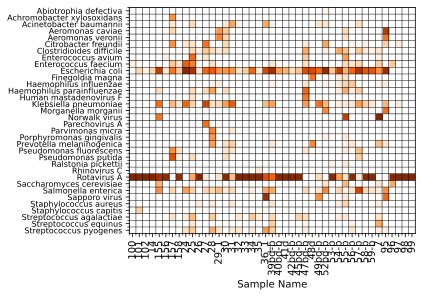

In [51]:
# Step 9. Create the base abundance heatmap.
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(figsize=(6, 6))

heatmap = ax.imshow(pivot_table, cmap='Oranges', aspect='equal', norm=LogNorm())

# add gridlines between cells
# The -0.5 shifts all values left by half a unit
# minor=True makes these "minor" ticks used for gridlines, not labels
# without the offset, the grid lines would be hidden behind the cell boundaries.
ax.set_xticks(np.arange(pivot_table.shape[1]) - 0.5, minor=True)
ax.set_yticks(np.arange(pivot_table.shape[0]) - 0.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)

# Label rows and columns
ax.set_yticks(np.arange(len(names)))
ax.set_yticklabels(names, fontsize=8)
ax.set_xticks(np.arange(len(samplenames)))
ax.set_xticklabels(samplenames, fontsize=10)

ax.set_xlabel("Sample Name")

# Adjust the layout for better spacing and readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Step 10. add metadata

In [52]:
# Step 11. Calculate statistics or metrics to supplement heatmap data
# create some summary statistics for the side bar chart
grouped_sum = big_df[[
    "name",
    "nt_rpm",
    "nt_contigs",
    "nt_count",
    "nr_contigs",
    "nr_rpm"
]].loc[big_df["name"].isin(pivot_table.index)].groupby(by=["name"]).sum()
grouped_sum.head()

,nt_rpm,nt_contigs,nt_count,nr_contigs,nr_rpm
name,,,,,
Abiotrophia defectiva,11.477806,0.0,6.0,0.0,7.651870
Achromobacter xylosoxidans,2349.833625,2.0,137.0,0.0,651.778670
Acinetobacter baumannii,2413.162681,3.0,143.0,5.0,4218.664000
Aeromonas caviae,144224.136511,14.0,8115.0,2.0,2511.133119
Aeromonas veronii,11888.523336,5.0,1805.0,5.0,2094.083268


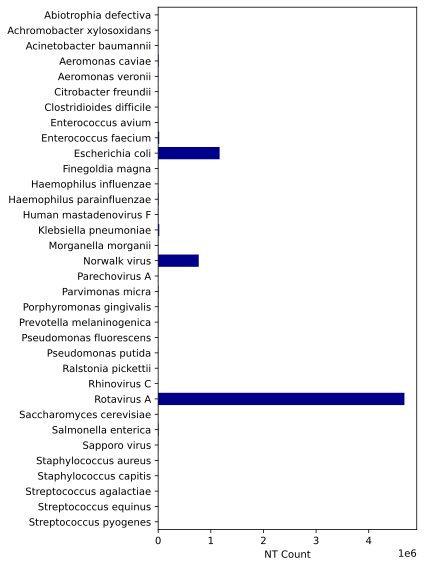

In [53]:
# Step 11. Create bar chart showing pathogen NT counts.
fig, ax_bar = plt.subplots(figsize=(6, 8))

# Create bar chart

ax_bar.barh(grouped_sum.index, grouped_sum["nt_count"], align='center', color='darkblue')

# Invert the y-axis to match the order of the heatmap
ax_bar.invert_yaxis()

ax_bar.set_ylim(len(grouped_sum.index) - 0.5, -0.5)  # align with cells in heatmap

# Customize bar chart display
ax_bar.set_yticks(grouped_sum.index)
ax_bar.set_yticklabels(grouped_sum.index)
ax_bar.set_xlabel("NT Count")
plt.tight_layout()  # Reduce the padding to remove unnecessary space
plt.show()

In [54]:
# Step 12. Overlay NT_count bar plot with a line graph of the NT mean over the barplot.
# create some summary statistics for the side bar chart - this time the mean
grouped_mean = big_df[[
    "name",
    "nt_rpm",
    "nt_contigs",
    "nt_count",
    "nr_contigs",
    "nr_rpm"
]].loc[big_df["name"].isin(pivot_table.index)].groupby(by=["name"]).mean()
grouped_mean.head()

,nt_rpm,nt_contigs,nt_count,nr_contigs,nr_rpm
name,,,,,
Abiotrophia defectiva,11.477806,0.00,6.00,0.00,7.651870
Achromobacter xylosoxidans,2349.833625,2.00,137.00,0.00,651.778670
Acinetobacter baumannii,241.316268,0.30,14.30,0.50,421.866400
Aeromonas caviae,28844.827302,2.80,1623.00,0.40,502.226624
Aeromonas veronii,2972.130834,1.25,451.25,1.25,523.520817


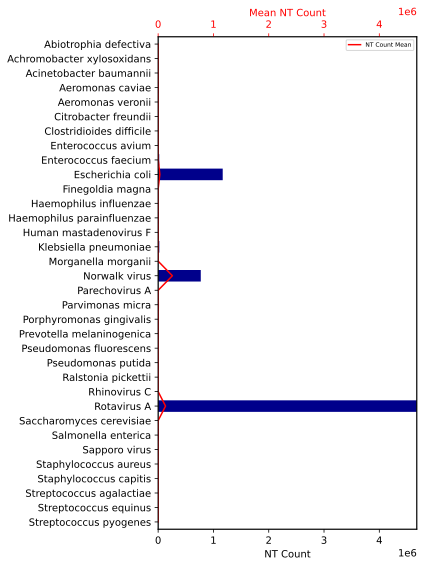

In [55]:
# # Prepare data
names = grouped_mean.index
sum_nt_count = grouped_sum["nt_count"]
mean_nt_count = grouped_mean["nt_count"]

# Create figure and primary axis
fig, ax_bar = plt.subplots(figsize=(6, 8))

# Create bar chart (sum values)
ax_bar.barh(names, sum_nt_count,
           align='center',
           color='darkblue',
           label='NT Count Sum')

# Configure primary axis (bar chart)
ax_bar.invert_yaxis()
ax_bar.set_ylim(len(names) - 0.5, -0.5)
ax_bar.set_xlabel("NT Count")
ax_bar.set_yticks(np.arange(len(names)))
ax_bar.set_yticklabels(names)

# Create secondary axis for line plot (mean values)
ax_line = ax_bar.twiny()
ax_line.plot(mean_nt_count,
            np.arange(len(names)),
            color='red',
            label='NT Count Mean')

# Align x-axes limits
x_min = 0
x_max = max(sum_nt_count.max(), mean_nt_count.max())
ax_bar.set_xlim(x_min, x_max)
ax_line.set_xlim(x_min, x_max)

# Configure secondary axis (line plot)
ax_line.set_xlabel("Mean NT Count", color='red')
ax_line.tick_params(axis='x', colors='red')

# Add legend and adjust layout
ax_line.legend(["NT Count Mean"], fontsize=6)
plt.tight_layout()
plt.show()


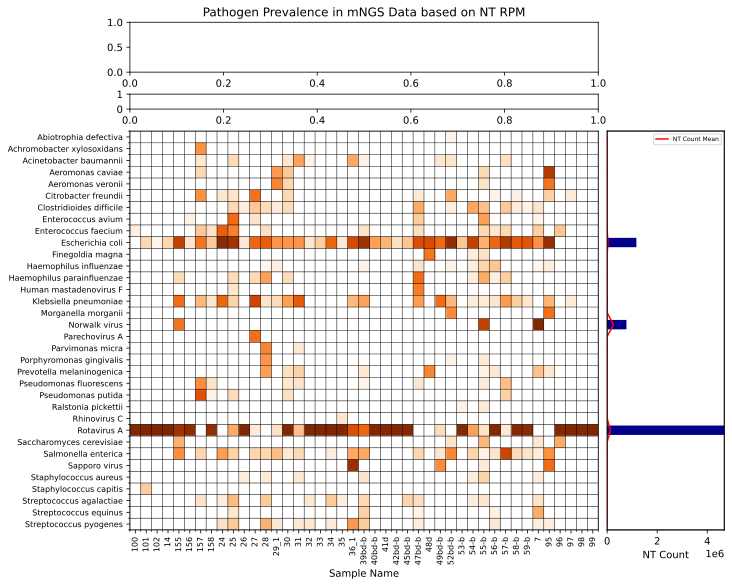

In [56]:
# Step 13. Combine everything together!
# Create figure with gridspec layout
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(nrows=3, ncols=2,
                    width_ratios=[4, 1],
                    height_ratios=[1, 0.3, 8])

# Create subplot axes
ax_table = fig.add_subplot(gs[0, 0])     # Table
ax_colorbar = fig.add_subplot(gs[1, 0])  # Location colorbar
ax_heatmap = fig.add_subplot(gs[2, 0])   # mNGS heatmap
ax_bar = fig.add_subplot(gs[2, 1])       # Bar chart

# Create table in ax_table
#ax_table.axis('off')
#col_labels = metadata_df["samplename"]
#row_labels = ['Meningococcus PCR results', 'Chikungunya serology results']
#data = [metadata_df["Meningococcus PCR results"],
#       metadata_df["Chikungunya serology results"]]

#table = ax_table.table(cellText=np.vstack([col_labels, data]),
#                     cellLoc='center',
#                     loc='center',
#                     rowLabels=[''] + row_labels)
#table.auto_set_font_size(False)
#table.set_fontsize(8)

# Set table cell borders
#for (i, j), cell in table.get_celld().items():
#   cell.set_linewidth(0 if i == 0 or j == -1 else 1)

# Create location colorbar in ax_colorbar
#locations = metadata_df["collection location"].unique()
#cmap = plt.get_cmap('plasma', len(locations))
#location_to_color = dict(zip(locations, cmap.colors))

# Plot location rectangles
#for i, location in enumerate(metadata_df["collection location"]):
#   ax_colorbar.add_patch(plt.Rectangle((i, 0), 1, 1, color=location_to_color[location]))

# Configure location colorbar
#ax_colorbar.set_xlim(0, len(metadata_df["collection location"]))
#ax_colorbar.set_ylim(0, 1)
#ax_colorbar.set_xticks(np.arange(len(metadata_df["collection location"])) + 0.5)
#ax_colorbar.set_xticklabels(metadata_df["collection location"], rotation=45, ha="right")
#ax_colorbar.set_yticks([])
#ax_colorbar.axis('off')

# Add location legend
#legend_patches = [patches.Patch(color=color, label=location)
#                for location, color in location_to_color.items()]
#plt.legend(handles=legend_patches,
#         loc='center left',
#         bbox_to_anchor=(1, 0.5),
#         title="Location Legend")

# Create mNGS heatmap in ax_heatmap
heatmap = ax_heatmap.imshow(pivot_table,
                          cmap='Oranges',
                          aspect='auto',
                          norm=LogNorm())

# Add heatmap gridlines
ax_heatmap.set_xticks(np.arange(pivot_table.shape[1] + 1) - 0.5, minor=True)
ax_heatmap.set_yticks(np.arange(pivot_table.shape[0] + 1) - 0.5, minor=True)
ax_heatmap.grid(which="minor", color="black", linestyle='-', linewidth=0.5)

# Configure heatmap labels
ax_heatmap.set_yticks(np.arange(len(names)))
ax_heatmap.set_yticklabels(names, fontsize=8)
ax_heatmap.set_xticks(np.arange(len(samplenames)))
ax_heatmap.set_xticklabels(samplenames, fontsize=8)
ax_heatmap.tick_params(axis='x', rotation=90)
ax_heatmap.set_xlabel("Sample Name")

# Create bar chart in ax_bar
ax_bar.barh(names, sum_nt_count,
           align='center',
           color='darkblue',
           label='NT Count Sum')

# Configure bar chart
ax_bar.invert_yaxis()
ax_bar.set_ylim(len(names) - 0.5, -0.5)
ax_bar.set_xlabel("NT Count")
ax_bar.set_yticks([])
ax_bar.set_yticklabels([])

# Add mean line plot
ax_line = ax_bar.twiny()
ax_line.plot(mean_nt_count,
            np.arange(len(names)),
            color='red',
            label='NT Count Mean')

# Align axes limits
x_min = 0
x_max = max(sum_nt_count.max(), mean_nt_count.max())
ax_bar.set_xlim(x_min, x_max)
ax_line.set_xlim(x_min, x_max)

# Configure line plot
ax_line.legend(fontsize=6)
ax_line.set_xticks([])
ax_line.set_xticklabels([])

# Final adjustments
ax_table.set_title("Pathogen Prevalence in mNGS Data based on NT RPM")
plt.tight_layout(pad=0.1)
plt.show()

# Save figure
fig.savefig('final_figure.svg', bbox_inches='tight', format="svg")

### 3.3. (Si da tiempo) Comparar las gráficas obtenidas en Python y CZ-ID para comparar con los datos de qPCR (tanto a nivel general como por muestra).
   - Con las gráficas de Python, CZ-ID y los datos de qPCR (generales y por patógeno) de las muestras secuenciadas comparar los resultados de secuenciación y de qPCR.
   - Discutir las diferencias.

# ME FALTA AÑADIR METADATA Y HACER MAS COMPARACIONES PERO ESTE FUE EL NOTEBOOK QUE PUDE HACER